# Data Exploration, Processing and Visualization

### This project analyzes the **Flights** dataset using Pandas and Seaborn 
### to clean, summarize, and visualize the data, resulting in clear and evidence-based insights.

## 1. Setup


- **Import the required libraries** (NumPy, Pandas, Matplotlib, Seaborn) and **load the dataset**.

In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [305]:
data = sns.load_dataset("flights")

## 2. Exploratory Data Analysis

- **Explore the dataset:** check its shape, column names, data types, and statistical summary.

In [306]:
print(f"The shape of the dataset is", data.shape)

The shape of the dataset is (144, 3)


- **Check the first few rows** to inspect the actual data.

In [307]:
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


- **Check the dataset’s columns and data types.**

In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


- **View the statistical summary of the dataset.**

In [309]:
data.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


- **Check the unique values in each column.**

In [310]:
pd.DataFrame({
    "Months": data['month'].unique(),
    "Years": data['year'].unique()
})

,Months,Years
0,Jan,1949
1,Feb,1950
2,Mar,1951
3,Apr,1952
4,May,1953
5,Jun,1954
6,Jul,1955
7,Aug,1956
8,Sep,1957
9,Oct,1958


- **Count how many times each unique value appears.**

In [311]:
data['month'].value_counts().rename('Count').to_frame()

,Count
month,
Jan,12
Feb,12
Mar,12
Apr,12
May,12
Jun,12
Jul,12
Aug,12
Sep,12


## What We Learned

### Dataset Overview
- Total of **144 entries** (index 0–143)
- Shape: **144 rows × 3 columns**
- Columns: **year**, **month**, **passengers**
- **2 numerical** features (`year`, `passengers`) and **1 categorical** feature (`month`)

### Key Insights
- Dataset spans **1949 to 1960**
- Passenger counts range from **104 to 622**
- **Average** number of passengers across the dataset: **~280**

## 3. Data Cleaning

- **Check for missing values and duplicate rows.**

In [312]:
print("Missing Values Check")
print("-"*40)
print(data.isnull().sum())
print(f"\n Total missing values: {data.isnull().sum().sum()}")

Missing Values Check
----------------------------------------
year          0
month         0
passengers    0
dtype: int64

 Total missing values: 0


In [313]:
print("Duplicates Check")
print("-"*40)
print(f"Number of duplicate rows: {data.duplicated().sum()}")

if data.duplicated().sum() > 0:
    print("\nDuplicate rows:")
    print(data[data.duplicated(keep=False)].sort_values('year'))

Duplicates Check
----------------------------------------
Number of duplicate rows: 0


## Data Quality Check
- **No missing values** were found.
- **No duplicate rows** detected.
- The dataset is **clean and ready for analysis**.

## 4. Data Aggregation & Summarazation

- ### Passengers distribution by year
##### -> Helps to understand the overall yearly trend and identify which years had more/fewer passengers

In [314]:
print("=" * 70)
print("PASSENGERS DISTRIBUTION BY YEAR")
print("=" * 70)

sum_passg_year = (data.groupby('year')['passengers'].sum().sort_values(ascending=False))

print(sum_passg_year )

print(f"\n→ Highest number of passengers: {sum_passg_year.index[0]} ({sum_passg_year.iloc[0]})")
print(f"→ Least number of passengers: {sum_passg_year.index[-1]} ({sum_passg_year.iloc[-1]})")

PASSENGERS DISTRIBUTION BY YEAR
year
1960    5714
1959    5140
1958    4572
1957    4421
1956    3939
1955    3408
1954    2867
1953    2700
1952    2364
1951    2042
1950    1676
1949    1520
Name: passengers, dtype: int64

→ Highest number of passengers: 1960 (5714)
→ Least number of passengers: 1949 (1520)


- ### Average passenger distribution by month
##### -> This shows us which months are typically busier/quieter, revealing any seasonal patterns

In [315]:
print("=" * 70)
print("AVERAGE PASSENGER DISTRIBUTION BY MONTH")
print("=" * 70)

sum_passg_month = (data.groupby('month')['passengers'].mean().round(2).sort_values(ascending=False))

print(sum_passg_month )

print(f"\n→ Highest number of passengers: {sum_passg_month.index[0]} ({sum_passg_month.iloc[0]})")
print(f"→ Least number of passengers: {sum_passg_month.index[-1]} ({sum_passg_month.iloc[-1]})")

AVERAGE PASSENGER DISTRIBUTION BY MONTH
month
Jul    351.33
Aug    351.08
Jun    311.67
Sep    302.42
May    271.83
Mar    270.17
Apr    267.08
Oct    266.58
Dec    261.83
Jan    241.75
Feb    235.00
Nov    232.83
Name: passengers, dtype: float64

→ Highest number of passengers: Jul (351.33)
→ Least number of passengers: Nov (232.83)


C:\Users\saral\AppData\Local\Temp\ipykernel_10440\1567527986.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_passg_month = (data.groupby('month')['passengers'].mean().round(2).sort_values(ascending=False))


- ### Passenger distribution over the calendar.
##### -> Matrix view of seasonality and yearly patterns

In [316]:
print("=" * 70)
print("PIVOT TABLE")
print("=" * 70)

pivot = data.pivot_table(values='passengers', index='month', columns='year')
print(pivot)

PIVOT TABLE
year    1949   1950   1951   1952   1953   1954   1955   1956   1957   1958  \
month                                                                         
Jan    112.0  115.0  145.0  171.0  196.0  204.0  242.0  284.0  315.0  340.0   
Feb    118.0  126.0  150.0  180.0  196.0  188.0  233.0  277.0  301.0  318.0   
Mar    132.0  141.0  178.0  193.0  236.0  235.0  267.0  317.0  356.0  362.0   
Apr    129.0  135.0  163.0  181.0  235.0  227.0  269.0  313.0  348.0  348.0   
May    121.0  125.0  172.0  183.0  229.0  234.0  270.0  318.0  355.0  363.0   
Jun    135.0  149.0  178.0  218.0  243.0  264.0  315.0  374.0  422.0  435.0   
Jul    148.0  170.0  199.0  230.0  264.0  302.0  364.0  413.0  465.0  491.0   
Aug    148.0  170.0  199.0  242.0  272.0  293.0  347.0  405.0  467.0  505.0   
Sep    136.0  158.0  184.0  209.0  237.0  259.0  312.0  355.0  404.0  404.0   
Oct    119.0  133.0  162.0  191.0  211.0  229.0  274.0  306.0  347.0  359.0   
Nov    104.0  114.0  146.0  172.0  180.0

C:\Users\saral\AppData\Local\Temp\ipykernel_10440\1720954923.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = data.pivot_table(values='passengers', index='month', columns='year')


## What We Learned

- The **highest number of passengers** occurs in **1960** (5714 passengers).
- The **lowest number of passengers** occurs in **1949** (1520 passengers).
- The dataset shows a **clear upward trend** over the years.
- As the years pass, the **number of passengers increases**.

- We observe strong **seasonal patterns**:
  - **July** consistently has the **highest** number of passengers.
  - **November** tends to have the **lowest**.
  - This reflects **seasonality**: more travel in **summer**, less in **winter**.

## 5. Feature Engineering

- ### Create new columns to make patterns easier to see.

**Add Date Column**
##### -> We combine the `year` and `month` columns to create a proper **datetime** column called `date`.  
This allows us to sort data chronologically and use **time-series** methods.

In [317]:
print("=" * 70)
print("FULL DATE")
print("=" * 70)

data['date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str),format='%Y-%b')
print(data['date'])

FULL DATE
0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: date, Length: 144, dtype: datetime64[ns]


**Add Season Column**
##### -> We map each `month` to a **season** (Winter, Spring, Summer, Autumn).  
This allows us to analyze **seasonal patterns**.

In [318]:
print("=" * 70)
print("MAPPING MONTHS TO SEASONS")
print("=" * 70)

seasons = {
    'Dec':'Winter', 'Jan':'Winter', 'Feb':'Winter',
    'Mar':'Spring', 'Apr':'Spring', 'May':'Spring',
    'Jun':'Summer','Jul':'Summer','Aug':'Summer',
    'Sep':'Autumn','Oct':'Autumn','Nov':'Autumn'
}

data['season'] = data['month'].map(seasons)

data[['month','season']].head(12)


MAPPING MONTHS TO SEASONS


,month,season
0,Jan,Winter
1,Feb,Winter
2,Mar,Spring
3,Apr,Spring
4,May,Spring
5,Jun,Summer
6,Jul,Summer
7,Aug,Summer
8,Sep,Autumn
9,Oct,Autumn


**Calculate the average number of passengers for each season**  
##### -> Group the data by the `season` column to see which seasons have higher or lower average passenger counts.

In [319]:
print("=" * 70)
print("AVERAGE PASSENGER COUNT BY SEASON")
print("=" * 70)

season_avg = data.groupby('season')['passengers'].mean().sort_values(ascending=False).round(2)
print(season_avg)

print(
    f"\n{season_avg.index[0]} has the highest average passenger count ({season_avg.iloc[0]:.2f}), "
    f"while {season_avg.index[-1]} has the lowest ({season_avg.iloc[-1]:.2f})."
)


AVERAGE PASSENGER COUNT BY SEASON
season
Summer    338.03
Spring    269.69
Autumn    267.28
Winter    246.19
Name: passengers, dtype: float64

Summer has the highest average passenger count (338.03), while Winter has the lowest (246.19).


In [320]:
data = data.sort_values(['date'])

**Yearly Change**
##### -> We show the **change in passengers** compared to the same month **one year earlier**.

In [321]:
data['yearly_change'] = data['passengers'].diff(12).astype('Int64')

**Yearly Percentage Change**
##### -> We show the **percent change** from the same month in the **previous year**.

In [322]:
data['yearly_change_pct'] = data['passengers'].pct_change(12) * 100

In [323]:
data['yearly_change_pct'] = data['yearly_change_pct'].round(2)

**Check DataFrame with the new added columns**

In [324]:
data.head(20)

,year,month,passengers,date,season,yearly_change,yearly_change_pct
0,1949,Jan,112,1949-01-01,Winter,<NA>,NaN
1,1949,Feb,118,1949-02-01,Winter,<NA>,NaN
2,1949,Mar,132,1949-03-01,Spring,<NA>,NaN
3,1949,Apr,129,1949-04-01,Spring,<NA>,NaN
4,1949,May,121,1949-05-01,Spring,<NA>,NaN
5,1949,Jun,135,1949-06-01,Summer,<NA>,NaN
6,1949,Jul,148,1949-07-01,Summer,<NA>,NaN
7,1949,Aug,148,1949-08-01,Summer,<NA>,NaN
8,1949,Sep,136,1949-09-01,Autumn,<NA>,NaN
9,1949,Oct,119,1949-10-01,Autumn,<NA>,NaN


## What We Learned

- Creating a combined **`date`** column allowed us to work with the data as a **time series**, making trends easier to observe.
- Adding the **`season`** column revealed clear **seasonal travel patterns**, with higher passenger numbers in **summer** and lower numbers in **winter**.
- The **yearly change** column showed that **air travel grew steadily year over year**, confirming long-term growth in demand.
- The yearly  **percentage change** columns provided a clearer view of **growth rates**, not just raw passenger counts.


## 6. Visualization with Matplotlib & Seaborn

### **How do passenger counts change over time?**
- Create a **time-series line plot** to visualize how the number of passengers changes across years.  
- This helps us clearly see the **overall trend** in passenger growth over time.


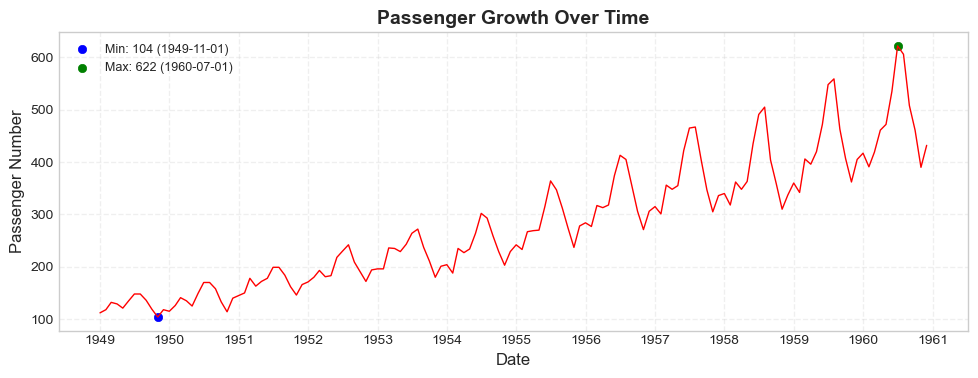

In [325]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

x = data['date']
y = data['passengers']

plt.figure(figsize=(10, 4))

plt.plot(x, y, color='red', linewidth=1)

min_idx = data['passengers'].idxmin()
max_idx = data['passengers'].idxmax()

min_date, min_val = data.loc[min_idx, ['date', 'passengers']]
max_date, max_val = data.loc[max_idx, ['date', 'passengers']]

min_point = plt.scatter(min_date, min_val, color='blue', label=f"Min: {min_val} ({min_date.date()})")
max_point = plt.scatter(max_date, max_val, color='green', label=f"Max: {max_val} ({max_date.date()})")

plt.legend(fontsize=9)

plt.title("Passenger Growth Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Passenger Number", fontsize=12)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.tick_params(axis='both', which='major', labelsize=10)

ax.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


- #### **Insights:**  
Passenger numbers show a **steady upward trend** from 1949 to 1960, indicating strong growth in air travel demand over time.  

The lowest passenger count appears at the beginning of the period, while the highest occurs near the end, confirming **long-term increasing**.

### **How do passenger counts vary by season?**
- Create a **bar chart** to compare the average number of passengers across seasons.  
- This allows us to clearly see which seasons have **higher travel demand** and which have **lower**.

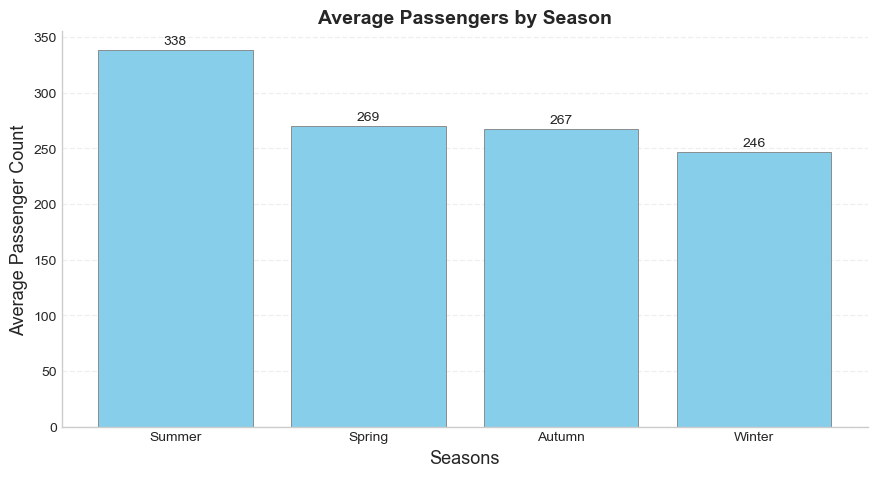

In [326]:
x = season_avg.index
y = season_avg.values

plt.figure(figsize=(9, 5))
bars = plt.bar(x, y, color='skyblue', edgecolor='gray', linewidth=0.6)

plt.grid(axis='y', linestyle='--', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 3, f"{int(height)}",
             ha='center', va='bottom', fontsize=10)

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=10)

ax.grid(axis='x', visible=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Average Passengers by Season", fontsize=14, fontweight='bold')
plt.xlabel("Seasons", fontsize=13)
plt.ylabel("Average Passenger Count", fontsize=13)

plt.tight_layout()
plt.show()


- #### **Insights:**  
Passenger demand is **highest in Summer** and **lowest in Winter**, showing a clear seasonal travel pattern where more people fly during warmer months.

### **How do passenger counts vary across months and years?**
- Create a **heatmap** to visualize passenger volume by month and year.  
- This allows us to clearly identify **seasonal patterns** and see how **travel demand increases over time**.

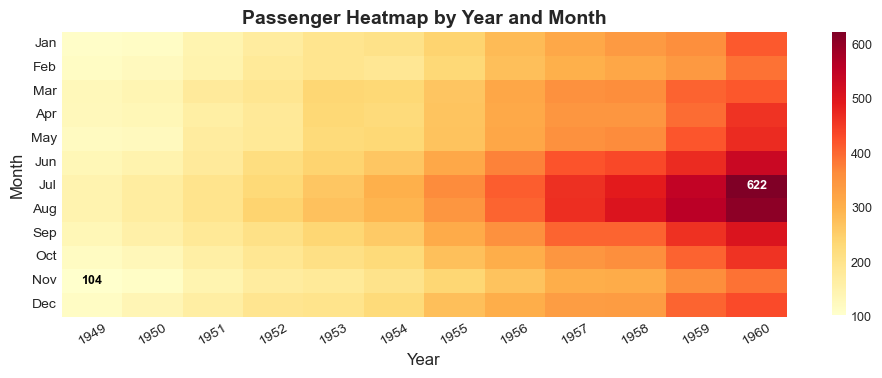

In [327]:
plt.figure(figsize=(10,4))
sns.heatmap(pivot, cmap='YlOrRd')

plt.title("Passenger Heatmap by Year and Month", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Month", fontsize=12)

ax = plt.gca()
ax.tick_params(axis='x', labelsize=10, rotation=30)
ax.tick_params(axis='y', labelsize=10)

min_val = pivot.min().min()
max_val = pivot.max().max()

min_loc = np.where(pivot == min_val)
max_loc = np.where(pivot == max_val)

ax.text(min_loc[1][0] + 0.5, min_loc[0][0] + 0.5, f"{int(min_val)}",
        ha='center', va='center', fontsize=9, fontweight='bold', color='black')

ax.text(max_loc[1][0] + 0.5, max_loc[0][0] + 0.5, f"{int(max_val)}",
        ha='center', va='center', fontsize=9, fontweight='bold', color='white')

cbar = ax.collections[0].colorbar
ticks = np.arange(100, max_val  + 1, 100, dtype=int)
cbar.set_ticks(ticks)
cbar.ax.tick_params(labelsize=9)

plt.tight_layout()
plt.show()

- #### **Insights:**  
  Passenger counts **increase steadily across years** and within each year, **Summer months show the highest demand** while **Winter months show the lowest**, highlighting a strong and consistent seasonal pattern.

### **How do passenger counts vary from month to month?**
- Create a **box plot** to compare passenger distributions for each month across all years.  
- This helps us identify **monthly travel patterns**, showing which months tend to have **higher** or **lower** passenger volumes.


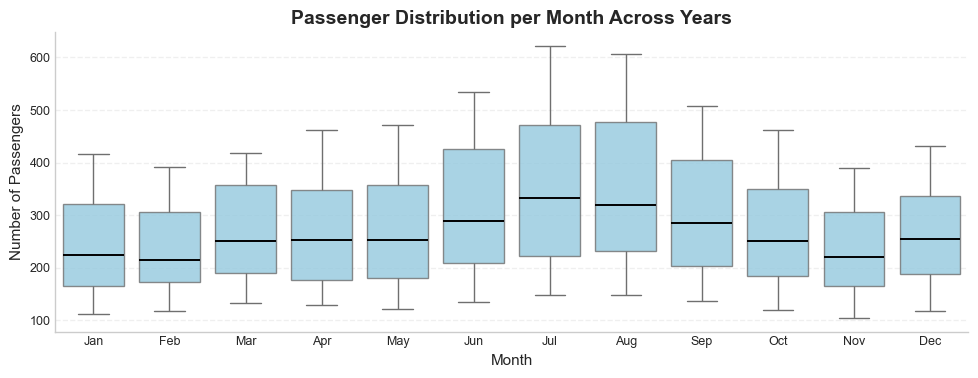

In [328]:
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)

plt.figure(figsize=(10,4))
sns.boxplot(x='month', y='passengers', data=data, color='skyblue',
            boxprops=dict(alpha=0.8),
            medianprops=dict(color='black', linewidth=1.4))

plt.title("Passenger Distribution per Month Across Years", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=11)
plt.ylabel("Number of Passengers", fontsize=11)

ax = plt.gca()
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)

ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


- #### **Insights:**  
  Passenger demand is **highest from June to August**, peaking in **July**, indicating strong summer travel activity.
    
  **November and December** show consistently **lower passenger counts**, reflecting reduced travel in late autumn and early winter.
    
  The pattern across months confirms a **clear seasonal cycle**, with travel rising into summer and falling toward the end of the year.


### **How is passenger growth changing from year to year?**
- Calculate the **average year-over-year growth rate** for each year using the percentage change column.  
- Plot a **line chart** to show whether passenger numbers are **increasing or slowing down** over time.

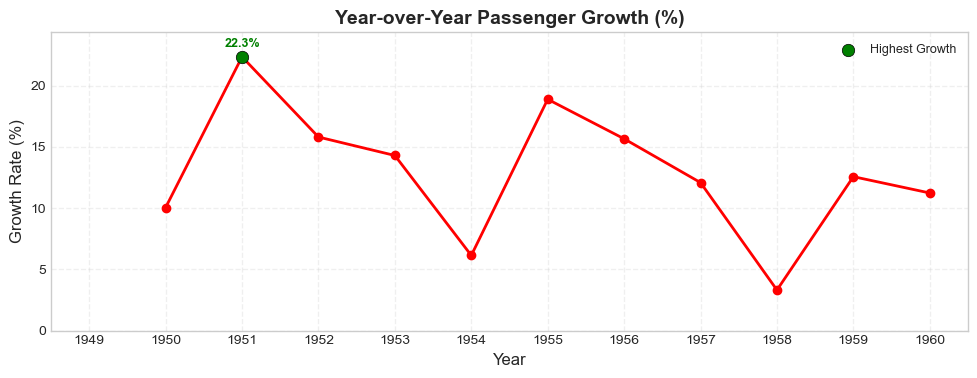

In [329]:
yearly_growth = data.groupby('year')['yearly_change_pct'].mean().reset_index()

x = yearly_growth['year']
y = yearly_growth['yearly_change_pct']

plt.figure(figsize=(10,4))
plt.plot(x, y, color='red', linewidth=2, marker='o', markersize=6)

ax = plt.gca()

ax.set_title("Year-over-Year Passenger Growth (%)", fontsize=14, fontweight='bold')
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Growth Rate (%)", fontsize=12)

max_idx = y.idxmax()
ax.scatter(x[max_idx], y[max_idx], 
           color='green', edgecolor='black', s=80, zorder=5, label='Highest Growth')

ax.text(x[max_idx], y[max_idx] + 0.8, f"{y[max_idx]:.1f}%", 
        ha='center', fontsize=9, fontweight='bold', color='green')

ax.set_xticks(x)
ax.set_xlim(x.min() - 0.5, x.max() + 0.5)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_ylim(0, y.max() + 2)

ax.legend(fontsize=9, loc='upper right')

plt.tight_layout()
plt.show()


- #### **Insights:**  
  Passenger growth remains **consistently positive**, indicating that air travel demand increases **every year** across the dataset.

  The growth trend becomes **steadier and stronger** in later years, suggesting **accelerating expansion** in air travel.

  No years dip below the zero line, showing there were **no downturn periods** in passenger demand within this timeframe.


Growth peaks sharply around 1951, likely reflecting post-war economic recovery and rising accessibility of commercial air travel.


A temporary slowdown in 1958 stands out as the lowest growth point, but the recovery in the following year shows the decline was short-lived rather than a lasting downturn.



### **How are passenger counts distributed overall?**
- Create a **histogram** to see how frequently different passenger levels occur.  
- This helps us understand the **shape of the distribution**, identify **common ranges**, and see whether values are **skewed** toward lower or higher passenger counts.

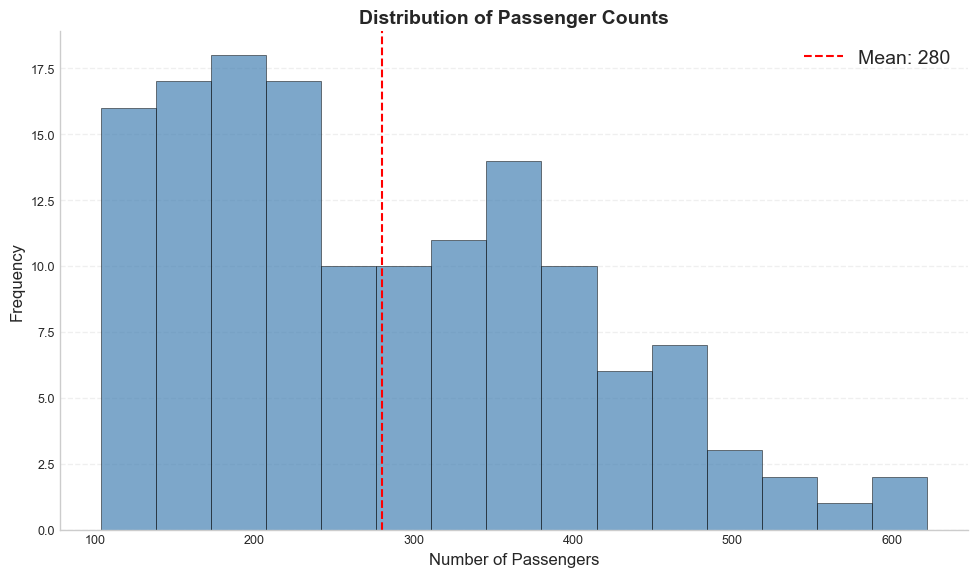

In [330]:
plt.figure(figsize=(10,6))
plt.hist(data['passengers'], bins=15, color='steelblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Passenger Counts', fontsize=14, fontweight='bold')
plt.xlabel('Number of Passengers', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

ax = plt.gca()
ax.tick_params(axis='x', labelsize=9)8
ax.tick_params(axis='y', labelsize=9)

ax.grid(False)
ax.yaxis.grid(True, linestyle='--', alpha=0.3)

mean_val = data['passengers'].mean()
plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f"Mean: {int(mean_val)}")
plt.legend(frameon=False)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

- #### **Insights:**  
  The average passenger count across the entire dataset is **~280 passengers per month** (red dashed line).
   
  Values below the mean mostly correspond to the **earlier years**, while values above the mean reflect the **later years** as air travel became more common.

  The distribution is **right-skewed**, meaning lower counts occurred more frequently in the early years, and higher counts became more frequent over time.

  Counts change **gradually**, and there are **no extreme outliers**, indicating steady growth rather than sudden jumps or drops.


### **What is the long-term trend in passenger numbers?**
- Create a **regression plot** to visualize the overall relationship between year and passenger counts.  
- The regression line helps us see the **long-term direction of growth**, smoothing out short-term fluctuations.

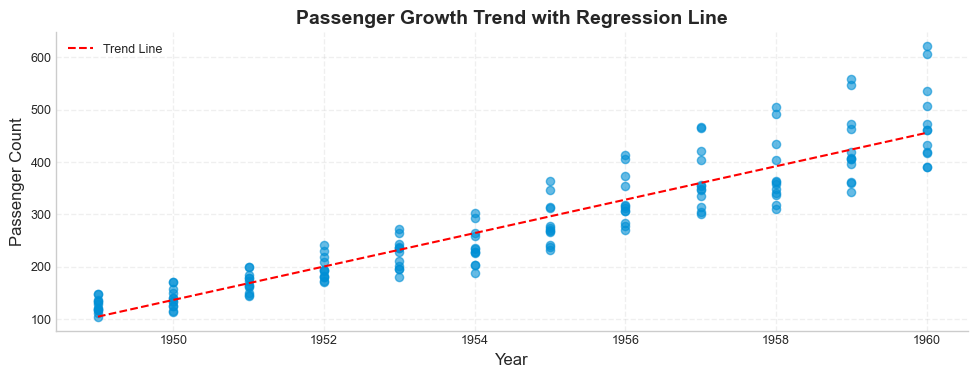

In [331]:
plt.figure(figsize=(10, 4))
ax = plt.gca()

ax = sns.regplot(
    x='year', y='passengers', data=data,
    scatter_kws={'alpha': 0.6, 's': 35},
    line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 1.5},
    ci=None 
)

ax.set_title('Passenger Growth Trend with Regression Line', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Passenger Count', fontsize=12)

ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)

ax.grid(True, linestyle='--', alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

trend_line = ax.lines[0]

ax.legend(
    handles=[trend_line],
    labels=['Trend Line'],
    frameon=False,
    fontsize=9,
    loc='upper left'
)

plt.tight_layout()
plt.show()


- #### **Insights:**  
  Passenger counts show a **clear and consistent upward trend** over the years, indicating that air travel demand **grew steadily throughout the period**.  

  The regression trend line smooths out month-to-month fluctuations and highlights the **long-term growth pattern**, confirming that the increase in passenger volume was **not random**, but part of a **sustained upward trajectory**.  

  This trend reflects the **ongoing expansion of commercial air travel**, likely driven by **increased accessibility, improvements in aviation infrastructure, and broader adoption of air travel** during this time.


- ## Final Insights

## What We Did

- Loaded and explored the **Flights** dataset containing **144 monthly records**.
  
- Checked dataset quality and confirmed:
  - **No missing values**
  - **No duplicate entries**
  - The dataset was **clean and required no preprocessing**

- Converted and organized **time-based features** by working with `year`, `month`, and a combined `date` index to support time-series analysis.

- Performed descriptive analysis to understand:
  - **Overall passenger distribution**
  - **Seasonal patterns across months**
  - **Long-term yearly trends**

- Calculated key metrics to quantify growth:
  - **Annual passenger totals**
  - **Year-over-year absolute change**
  - **Year-over-year percentage growth**

- Created visualizations to uncover trends and patterns:
  - **Histogram** → showed the overall distribution of passenger counts
  - **Boxplot** → highlighted **seasonal variation** by month
  - **Line Plot** → displayed the **upward yearly trend** in passenger counts
  - **Year-Over-Year Growth Plot** → revealed how growth changed from year to year
  - **Scatter Plot** → confirmed the **strong long-term upward trajectory**
  - **Bar chart** → which seasons have higher/lower demand
  - **Heatmap** → combined view of trend + seasonality


## What We Learned

- The dataset spans **1949 to 1960**, allowing us to observe **long-term trends** in air travel demand.

- Creating a combined **`date`** index enabled us to treat the dataset as a **continuous time series**, making patterns and trends easier to visualize.

- **Monthly averages** revealed a clear **seasonal pattern**:
  - Passenger counts **peak in summer** (especially **July** and **August**)
  - Passenger counts **drop in late autumn** (especially **November**)

- The **yearly passenger totals** and **year-over-year percentage growth** showed a **steady rise** in passenger volumes, confirming the **continuous expansion** of commercial air travel during this period.

- The **regression trend line** highlighted a **strong long-term upward trajectory**, smoothing out short-term seasonal variation to reveal the **overall growth direction**.

- The **distribution of passenger counts** shifts upward over the years, indicating that air travel became **increasingly common and more widely accessible** as time progressed.
